In [10]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

pred_path = "/projects/mhpi/leoglonz/dPLT/output/29apr2/ls_aggregate/train2012-2020/no_multi/CudnnLstmModel_E3_R12_B5_H256_n4_noLn_noWU_111111/TerzaghiMultiLayer/NseBatchLoss/stat/test2012-2020_Ep3/v_disp.npy"
obs_path = "/projects/mhpi/leoglonz/dPLT/output/29apr2/ls_aggregate/train2012-2020/no_multi/CudnnLstmModel_E3_R12_B5_H256_n4_noLn_noWU_111111/TerzaghiMultiLayer/NseBatchLoss/stat/test2012-2020_Ep3/v_disp_obs.npy"
path = '/projects/mhpi/leoglonz/data/extracted/land_subsidence/ls_train'


with open(path, 'rb') as f:
    data = pickle.load(f)
target = data['target']


pred = np.load(pred_path) # Predicted land subsidence (daily deltas)
obs = np.load(obs_path)    # Observed land subsidence (daily deltas)
print("Predicted shape:", pred.shape)  # [months, stations]
print("Observed shape:", obs.shape)    # [months, stations]

# Compute cumulative subsidence
cumulative_pred = np.cumsum(pred, axis=0)  # Cumulative predicted subsidence
cumulative_obs = np.cumsum(obs, axis=0)    # Cumulative observed subsidence

# Extract dimensions
num_days, num_stations = pred.shape

# Generate time axis (assuming one month per row)
time_days = np.arange(num_days)

Predicted shape: (88, 16)
Observed shape: (88, 16)


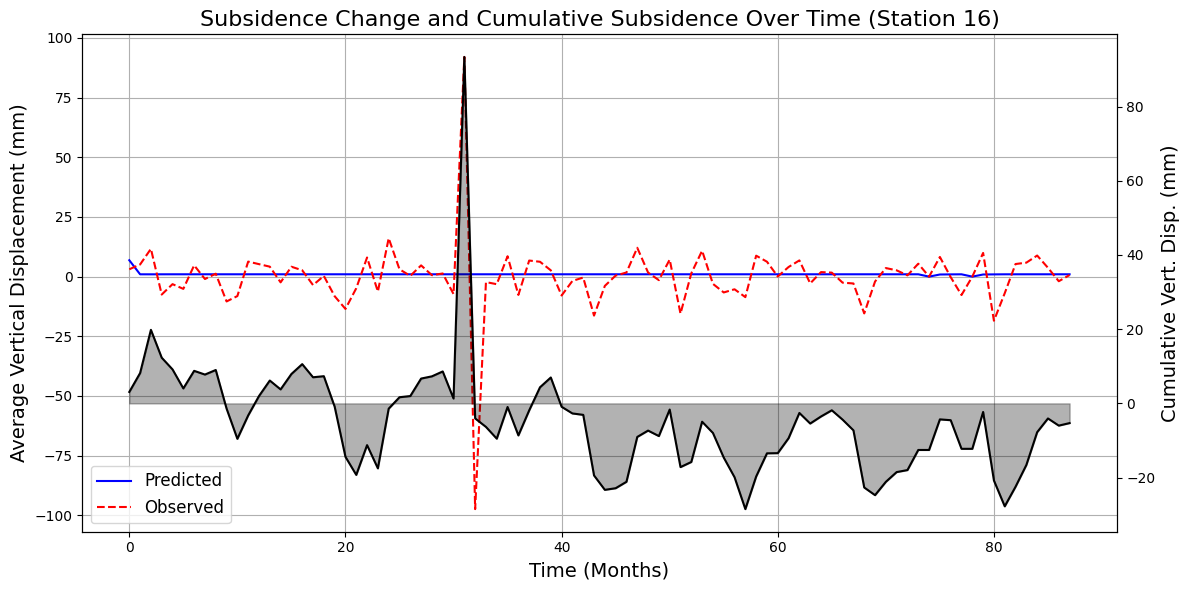

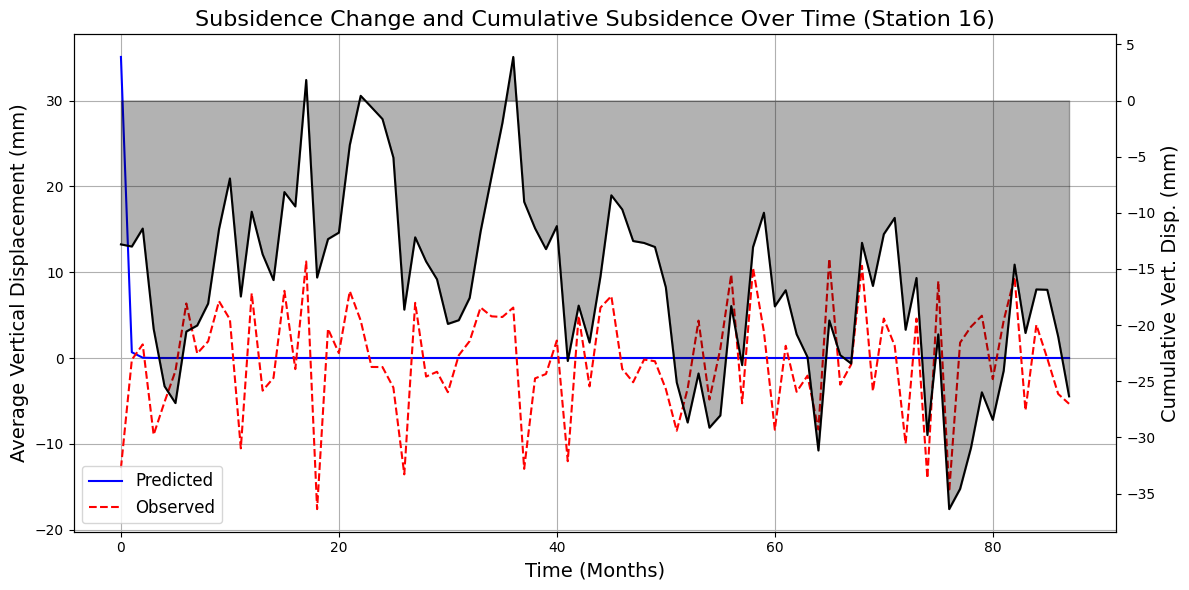

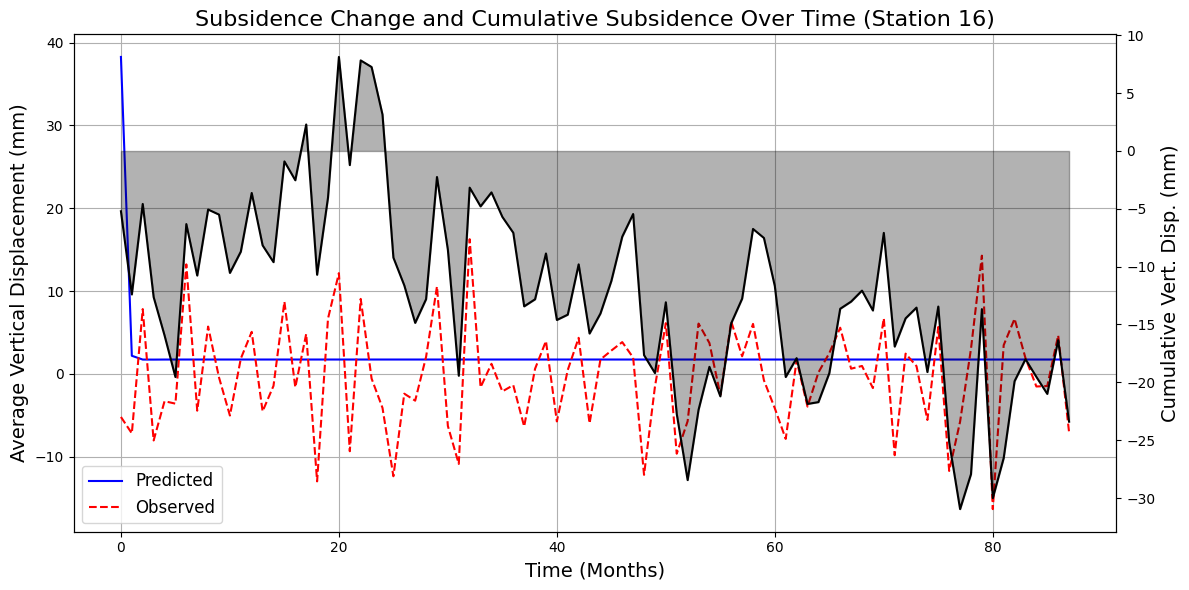

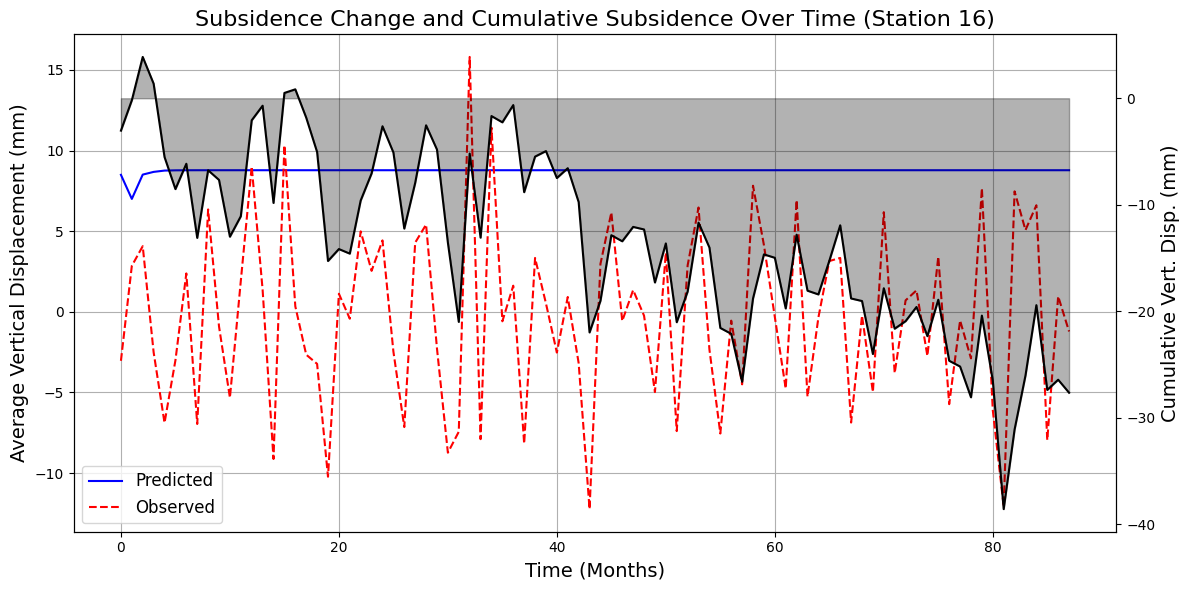

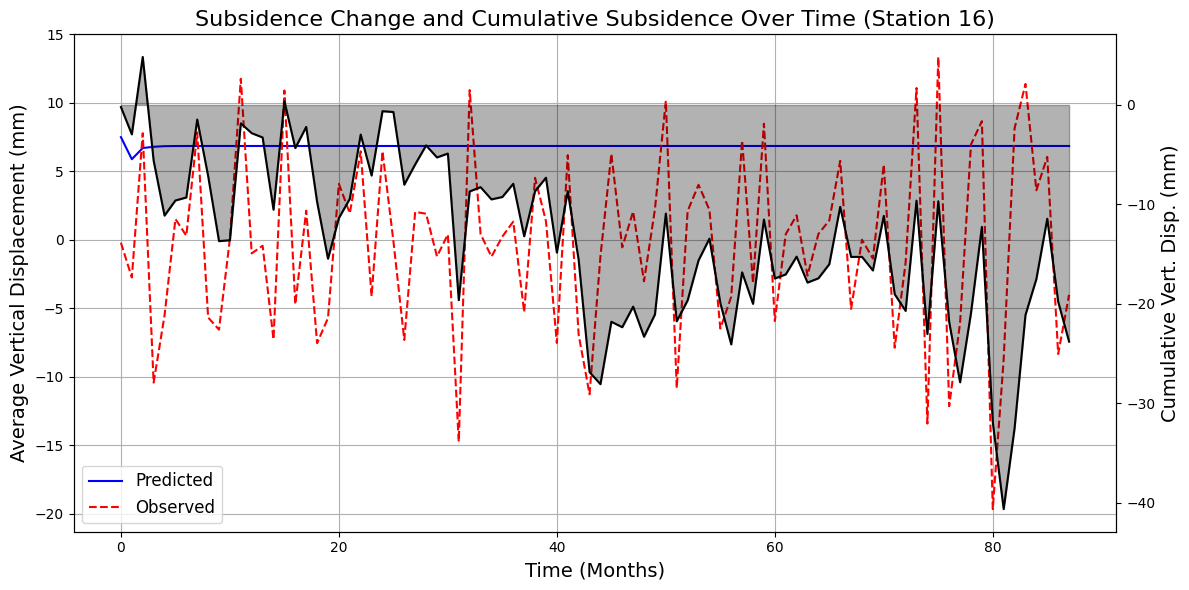

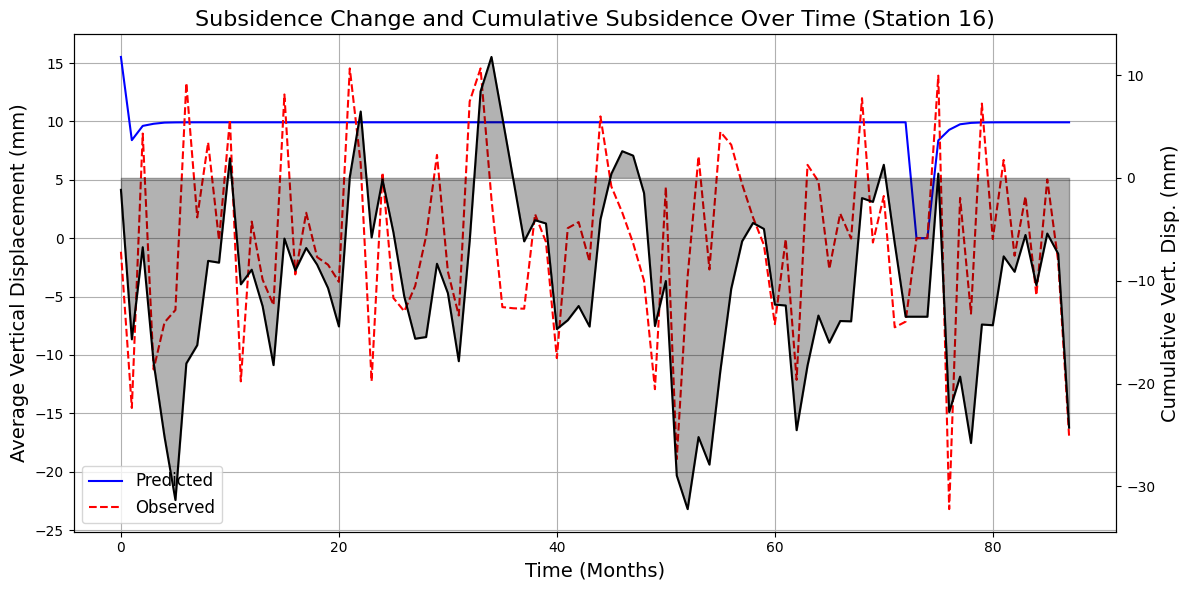

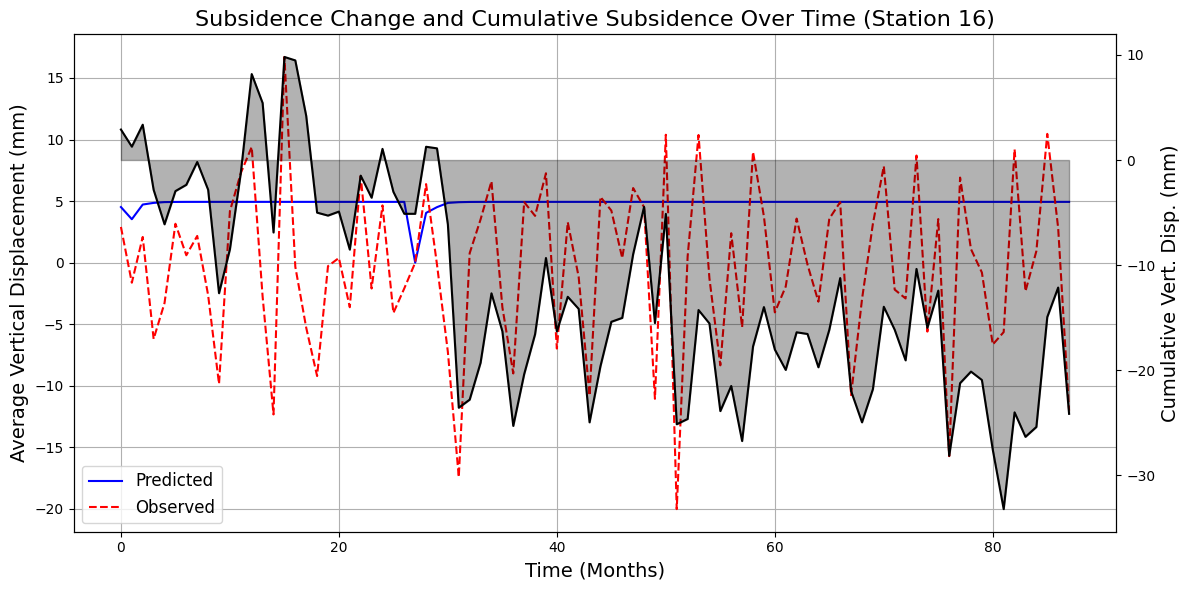

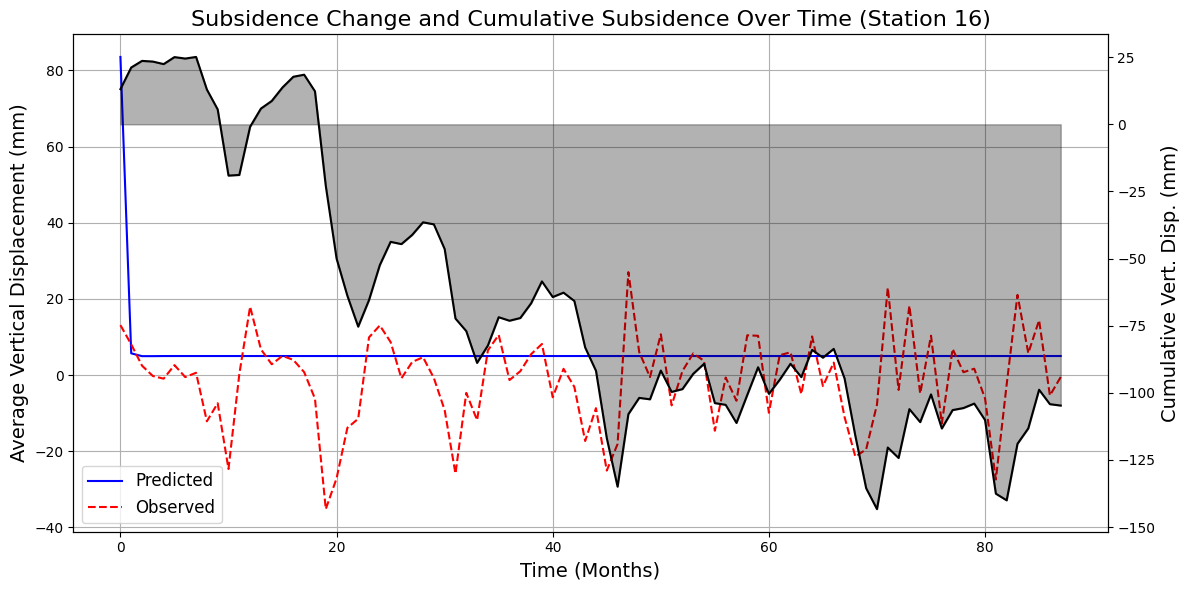

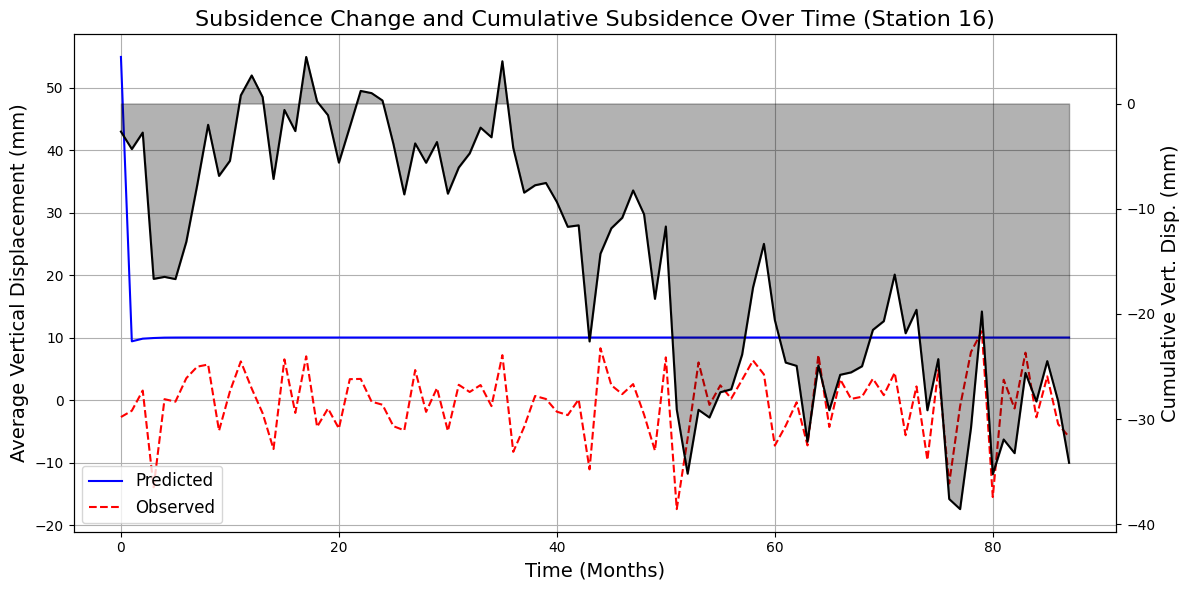

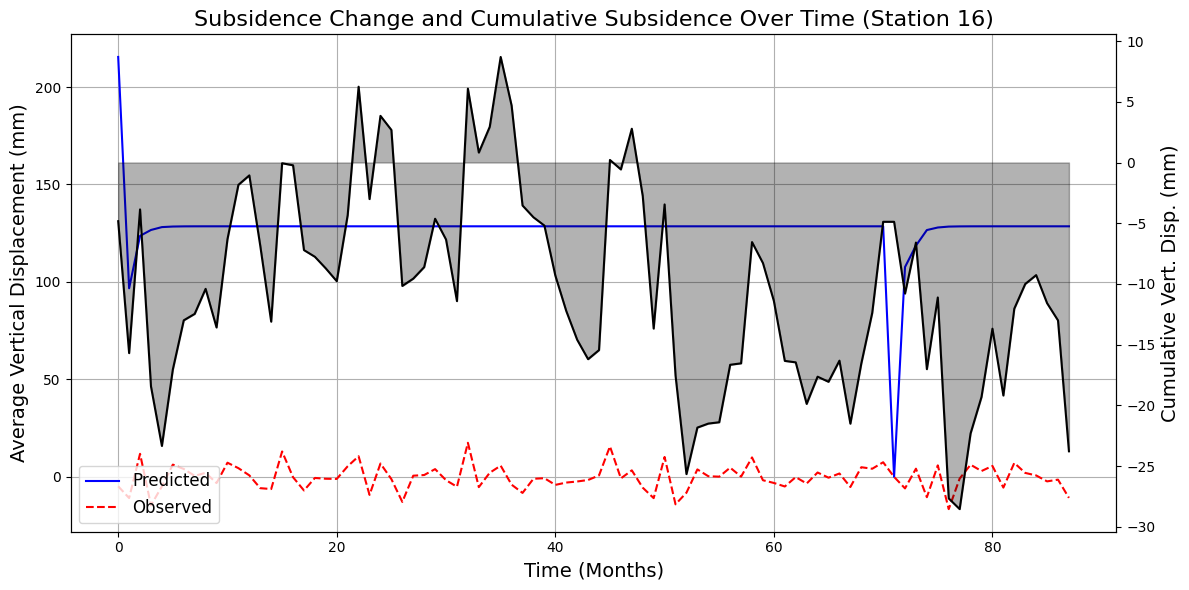

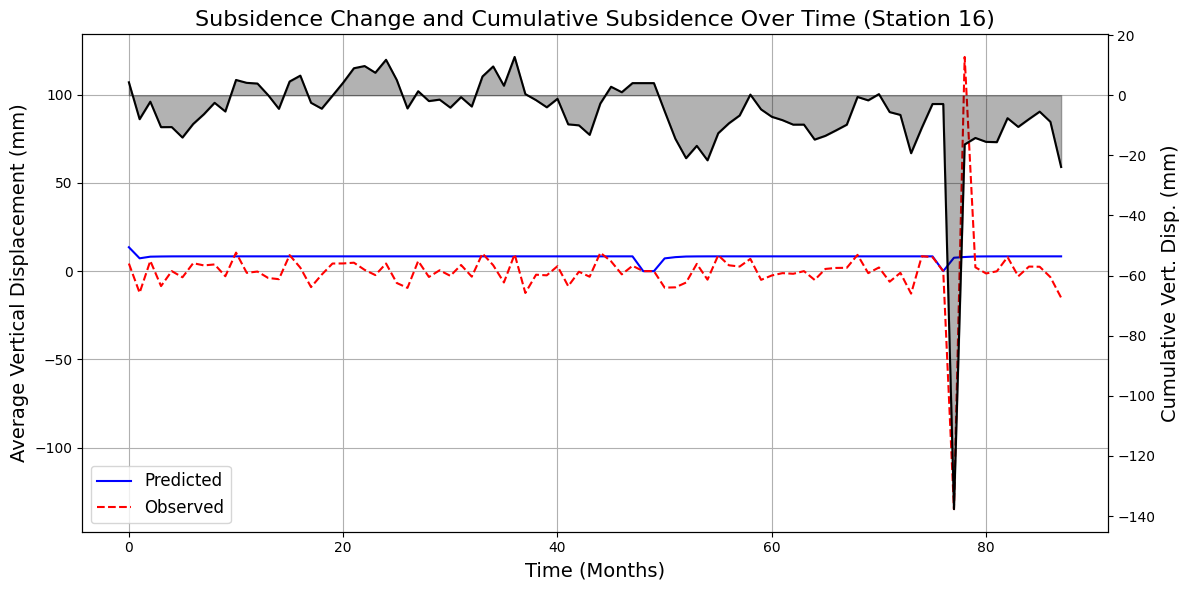

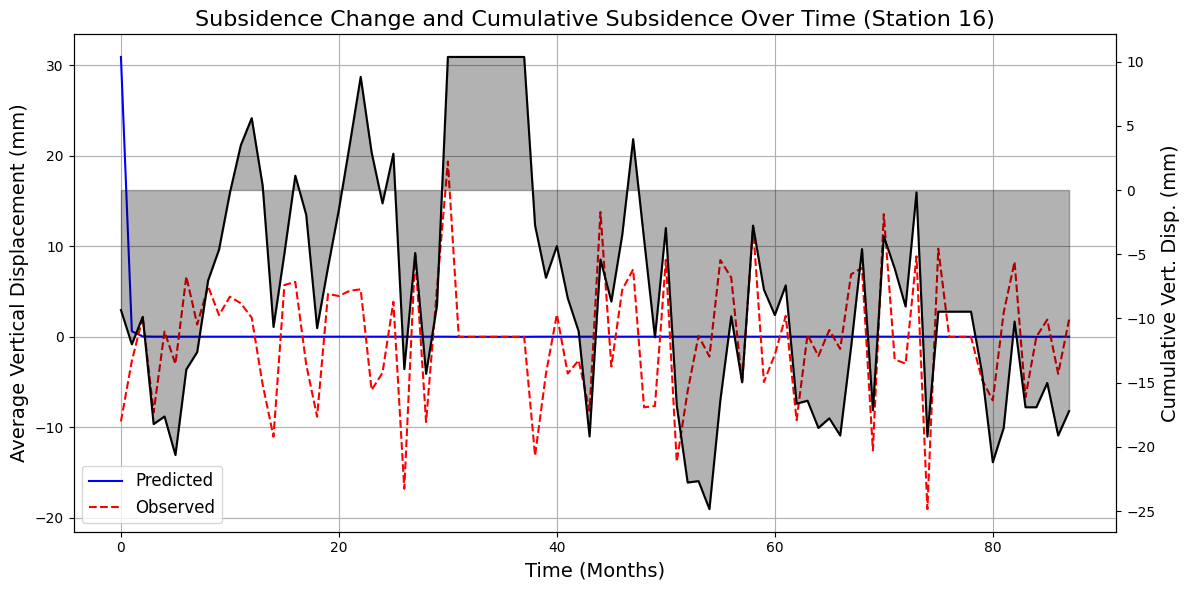

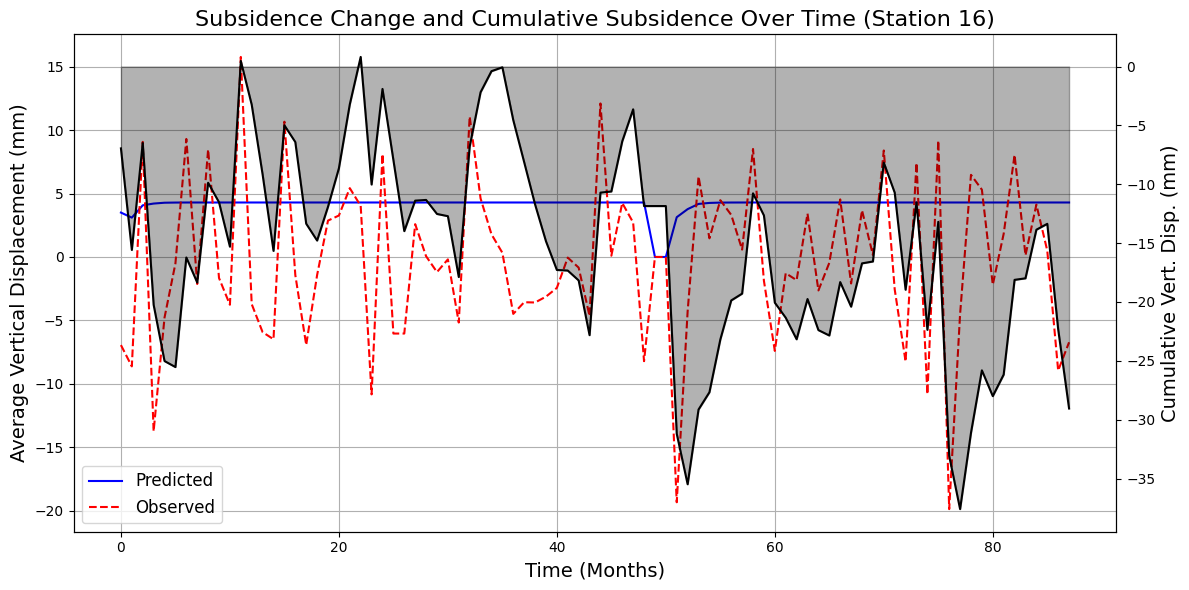

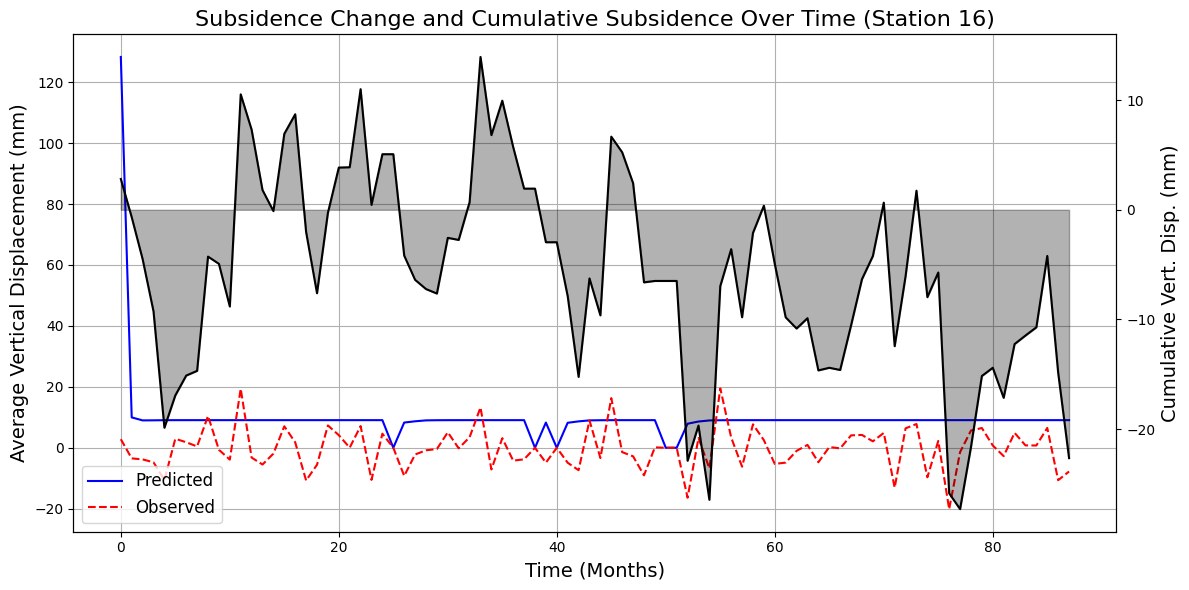

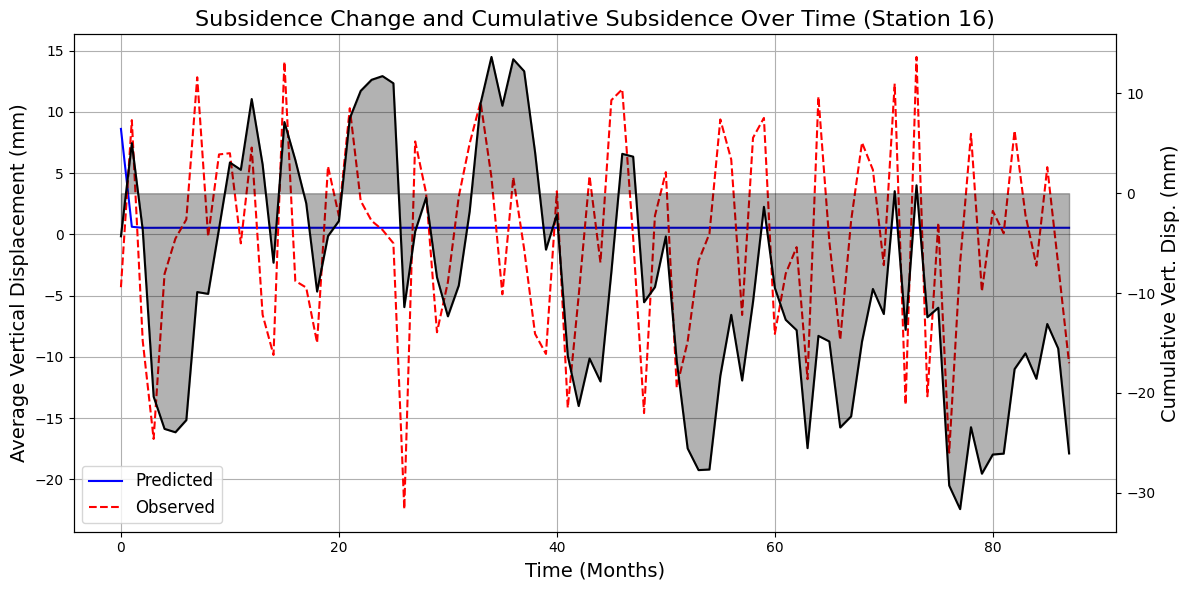

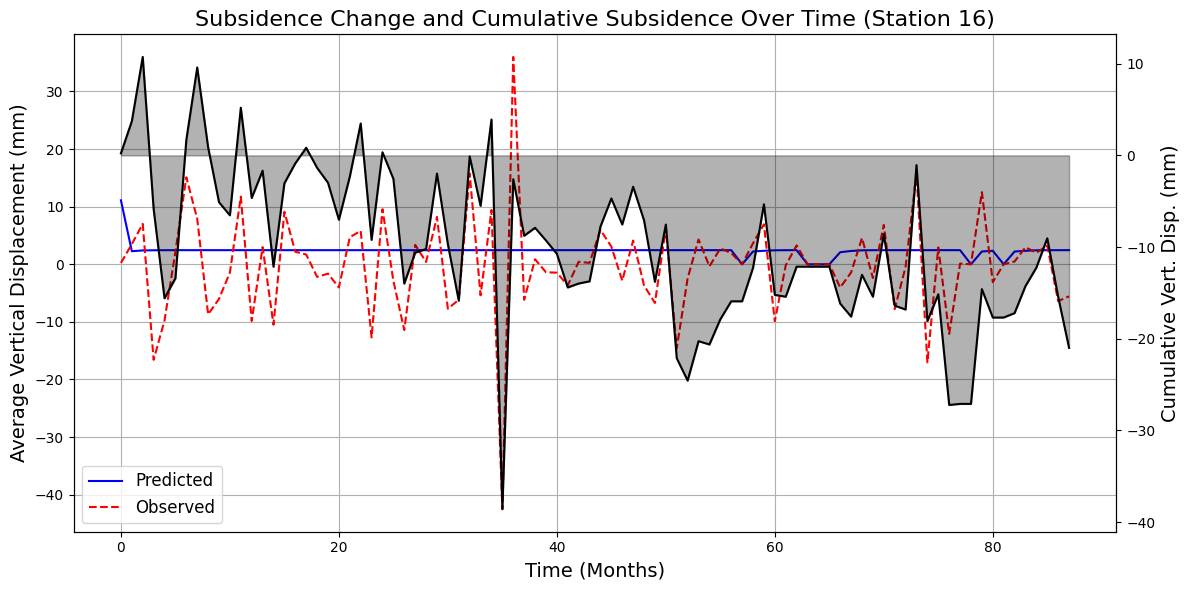

In [11]:
import numpy as np
import matplotlib.pyplot as plt

STATION_IDX = 16


for idx in range(STATION_IDX):
    # Choose a specific station to plot
    pred_station = pred[:, idx]  # monthly predicted subsidence
    obs_station = obs[:, idx]    # monthly observed subsidence
    cumulative_pred_station = cumulative_pred[:, idx]  # Cumulative predicted
    cumulative_obs_station = cumulative_obs[:, idx]    # Cumulative observed

    # Create the twin-axis plot
    fig, ax1 = plt.subplots(figsize=(12, 6), dpi=100)

    # Plot the daily/monthly subsidence change on the LHS y-axis
    ax1.plot(time_days, pred_station, label="Predicted", color="blue", linestyle="-")
    ax1.plot(time_days, obs_station, label="Observed", color="red", linestyle="--")
    ax1.set_xlabel("Time (Months)", fontsize=14)
    ax1.set_ylabel("Average Vertical Displacement (mm)", fontsize=14)
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.legend(loc="lower left", fontsize=12)
    ax1.grid(True)

    # Create a second y-axis for cumulative subsidence
    ax2 = ax1.twinx()
    # ax2.plot(time_days, cumulative_pred_station, label="Cumulative Predicted", color="green", linestyle="-")
    ax2.plot(time_days, cumulative_obs_station, label="Cumulative Observed", color="black")
    ax2.set_ylabel("Cumulative Vert. Disp. (mm)", fontsize=14)
    ax2.tick_params(axis='y', labelcolor='black')
    # plt.legend(loc="upper right", fontsize=12)

    # Shade the area under the cumulative_obs_station curve
    ax2.fill_between(
        time_days,
        cumulative_obs_station,
        color="black",
        alpha=0.3,  # Low opacity for shading
        label="Cumulative Observed (Shaded)"
    )

    # Add a title
    plt.title(f"Subsidence Change and Cumulative Subsidence Over Time (Station {STATION_IDX})", fontsize=16)

    # Show the plot
    plt.tight_layout()
    plt.show()